In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras import Input
# from tensorflow.data import Dataset
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import itertools

In [27]:
import os
train_image_files_path='C:/Users/ADMIN/Downloads/datanumber/filetrain'
valid_image_files_path='C:/Users/ADMIN/Downloads/datanumber/filevalid'

In [28]:
label=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)
valid_data_gen = ImageDataGenerator(rescale=1/255)

In [30]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

valid_generator = valid_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(48,48),
    class_mode='categorical'
)

Found 767 images belonging to 10 classes.
Found 167 images belonging to 10 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

#LopCNN1
model.add(Conv2D(4,(3,3), activation='relu',input_shape=(48,48,3)))
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))
#LopCNN2
model.add(Conv2D(8,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#LopCNN3
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(80,activation=tf.nn.relu))

model.add(Dense(10, activation=tf.nn.softmax))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 4)         112       
                                                                 
 dropout_4 (Dropout)         (None, 46, 46, 4)         0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 8)         296       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 16)         

In [33]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [34]:
EPOCHS=80
history=model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=EPOCHS,
    verbose=1,
    validation_data=valid_generator,
    validation_steps=5
)

Epoch 1/80
20/20 [==============================] - 2s 48ms/step - loss: 2.2657 - acc: 0.1721 - val_loss: 2.2398 - val_acc: 0.2000
Epoch 2/80
20/20 [==============================] - 1s 39ms/step - loss: 2.0146 - acc: 0.3208 - val_loss: 2.1245 - val_acc: 0.3063
Epoch 3/80
20/20 [==============================] - 1s 41ms/step - loss: 1.6602 - acc: 0.4397 - val_loss: 1.8800 - val_acc: 0.4125
Epoch 4/80
20/20 [==============================] - 1s 38ms/step - loss: 1.3413 - acc: 0.5290 - val_loss: 1.6995 - val_acc: 0.4125
Epoch 5/80
20/20 [==============================] - 1s 39ms/step - loss: 1.0860 - acc: 0.6354 - val_loss: 1.5004 - val_acc: 0.5375
Epoch 6/80
20/20 [==============================] - 1s 39ms/step - loss: 0.8998 - acc: 0.6948 - val_loss: 1.3268 - val_acc: 0.6000
Epoch 7/80
20/20 [==============================] - 1s 39ms/step - loss: 0.6795 - acc: 0.7856 - val_loss: 1.1175 - val_acc: 0.6875
Epoch 8/80
20/20 [==============================] - 1s 40ms/step - loss: 0.5432 - a

In [35]:
model.save('model.h5')

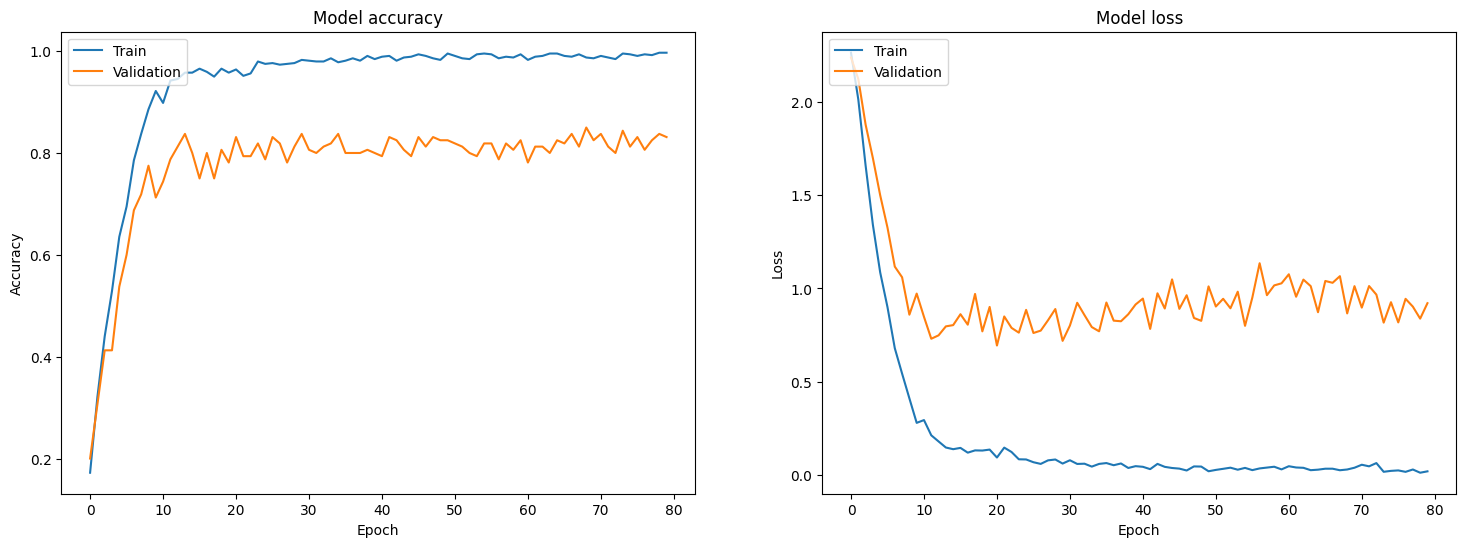

In [36]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['acc'])
axes[0].plot(history.history['val_acc'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 27ms/step
Gia tri du doan: [8]


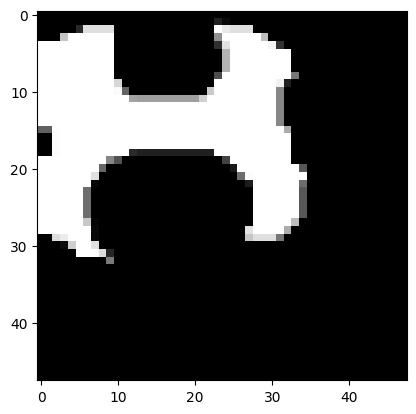

In [48]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
from matplotlib import pyplot as plt
from flatten_json import flatten
from scipy.ndimage import median_filter

img_path='C:/Users/ADMIN/Downloads/17/picture70.jpg'
img_gray = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
rotate = imutils.rotate(img_gray, 3)
cropped_image = rotate[95:182, 355:780]
brightness = 10 
contrast = 2.3 
image2 = cv.addWeighted(cropped_image, contrast, np.zeros(cropped_image.shape, rotate.dtype), 0, brightness)

cropped_image2 = image2[1:85, 350:417]

img_blur = cv.blur(src=cropped_image2, ksize=(3,3)) # Using the blur function to blur an image where ksize is the kernel size
hist,bins = np.histogram(img_blur.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max())/cdf.max()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0) .astype('uint8')
img_his = cdf[img_blur]
    
thresh, img_binary = cv.threshold(img_his, thresh=90, maxval=255, type=cv.THRESH_BINARY_INV)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv.erode(img_binary, kernel, iterations=1)
resized_image = cv.resize(img_erosion, (48, 48))

expanded_image = np.expand_dims(resized_image, axis=-1)
expanded_image = np.repeat(expanded_image, 3, axis=-1)

plt.imshow(expanded_image)

# img=tf.keras.utils.load_img(img_path,target_size=(48,48))
x=tf.keras.utils.img_to_array(expanded_image)
x=np.expand_dims(x,axis=0)
images= np.vstack([x])
y_predict = model.predict(images, batch_size=10)
predicted_numbers = np.argmax(y_predict, axis=1)
print('Gia tri du doan:', predicted_numbers)

# predicted_numbers = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
np.savetxt('predictions.txt', predicted_numbers, fmt='%d')

In [38]:
model.layers

In [39]:
output_layers=[
    layer.output for layer in model.layers
]

In [40]:
output_layers

[<KerasTensor: shape=(None, 46, 46, 4) dtype=float32 (created by layer 'conv2d_6')>,
 <KerasTensor: shape=(None, 46, 46, 4) dtype=float32 (created by layer 'dropout_4')>,
 <KerasTensor: shape=(None, 23, 23, 4) dtype=float32 (created by layer 'max_pooling2d_6')>,
 <KerasTensor: shape=(None, 21, 21, 8) dtype=float32 (created by layer 'conv2d_7')>,
 <KerasTensor: shape=(None, 10, 10, 8) dtype=float32 (created by layer 'max_pooling2d_7')>,
 <KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'conv2d_8')>,
 <KerasTensor: shape=(None, 8, 8, 16) dtype=float32 (created by layer 'dropout_5')>,
 <KerasTensor: shape=(None, 4, 4, 16) dtype=float32 (created by layer 'max_pooling2d_8')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'flatten_2')>,
 <KerasTensor: shape=(None, 80) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]